In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
df=pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv',dtype='unicode')
columns_from_main=['location','date','total_cases','new_cases','new_deaths','new_vaccinations']

# Filtering the data



<p>1) Last 180 days for each of the 180 countries <br>
    2) Selecting 20 countries worth of data <br>
3) Removing all the rows with NaN values </p>



In [3]:

df['date']=pd.to_datetime(df['date'])
mask=(df['date']>='5/13/2021')&(df['date']<='11/8/2021')
df_location=df.loc[(mask)&((df['location'] == 'Singapore')|(df['location'] =='South Korea')|(df['location'] =='India')|(df['location'] =='Philippines')|(df['location'] =='Japan')|(df['location'] =='Vietnam')|(df['location']=='United Kingdom')|(df['location']=='Pakistan')|(df['location']=='Germany')|(df['location']=='Nigeria')|(df['location']=='Italy')|(df['location']=='China')|(df['location']=='Indonesia')|(df['location']=='Thailand')|(df['location']=='United Arab Emirates')|(df['location']=='Portugal')|(df['location']=='Cuba')|(df['location']=='Ethiopia')),columns_from_main]
df_location.dropna(subset=['new_vaccinations'],inplace=True)

print(df_location.size)
print("The locations under observation are:\n",df_location)

14574
The locations under observation are:
        location       date total_cases new_cases new_deaths new_vaccinations
25321     China 2021-05-13     90864.0       7.0        0.0       12638000.0
25322     China 2021-05-14     90878.0      14.0        0.0       13723000.0
25323     China 2021-05-15     90896.0      18.0        0.0       12354000.0
25324     China 2021-05-16     90922.0      26.0        0.0       13951000.0
25325     China 2021-05-17     90944.0      22.0        0.0       15053000.0
...         ...        ...         ...       ...        ...              ...
132133  Vietnam 2021-10-31    921122.0    5519.0       53.0         554499.0
132134  Vietnam 2021-11-01    926720.0    5598.0       48.0        1201589.0
132135  Vietnam 2021-11-02    932357.0    5637.0       74.0         959435.0
132136  Vietnam 2021-11-03    939463.0    7106.0       78.0         793175.0
132137  Vietnam 2021-11-04    946043.0    6580.0       59.0        1435734.0

[2429 rows x 6 columns]


# Collections of Functions

In [4]:
#This part is from the cohort problem set:
def get_features_targets(df, feature_names, target_names):
    df_feature=df[feature_names]
    df_target=df[target_names]
    return df_feature, df_target

def normalize_z(df):
    return (df-df.mean())/df.std()

def prepare_feature(df_feature):
    df_feature=df_feature.to_numpy()
    c_ones=np.ones((df_feature.shape[0],1))
    df_feature=np.hstack((c_ones,df_feature))
    return df_feature

def prepare_target(df_target):
    df_target=df_target.to_numpy()
    return df_target

def predict(df_feature, beta):
    X=prepare_feature(normalize_z(df_feature))
    return predict_norm(X,beta)

def predict_norm(X, beta):
    return np.matmul(X,beta)

def split_data(df_feature, df_target, random_state=None, test_size=0.5):
    indexes=df_feature.index
    if random_state!=None:
        np.random.seed(random_state)
    num_rows = len(indexes)
    k = int(test_size * num_rows)
    test_indices = np.random.choice(indexes, k, replace = False)
    train_indices = set(indexes) - set(test_indices)
    
    df_feature_train = df_feature.loc[train_indices, :]
    df_feature_test = df_feature.loc[test_indices, :]
    df_target_train = df_target.loc[train_indices, :]
    df_target_test = df_target.loc[test_indices, :]
    return df_feature_train, df_feature_test, df_target_train, df_target_test
  
def r2_score(y, ypred):
    SS_res=np.sum((y-ypred)**2)
    SS_tot=np.sum((y-np.mean(y))**2)
    return (1-(SS_res/SS_tot))

def mean_squared_error(target, pred):
    return ((np.sum(target-pred)**2)/(target.shape[0]))

def gradient_descent(X, y, beta, alpha, num_iters):
    n=X.shape[0]
    J_storage=np.zeros((num_iters,1))
    for i in range(num_iters):
        derivative=np.matmul(X.T,(np.matmul(X,beta)-y))
        beta=beta-(alpha/n*derivative)
        J_storage[i]=compute_cost(X,y,beta)
    return beta, J_storage

def compute_cost(X, y, beta):
    J = 0
    m = X.shape[0]
    error = np.matmul(X,beta) - y
    error_sq = np.matmul(error.T, error)
    plt.scatter(X[:,1], y)
    J = 1/(2*m) * error_sq
    J = J[0][0]
    return J

# Splitting data
### Target: New Deaths
### Feature: New Cases and New Vaccinations

[[-7.99634038]
 [-7.74946254]
 [-7.40821049]
 ...
 [-6.17709018]
 [-1.73274032]
 [-9.66055656]]


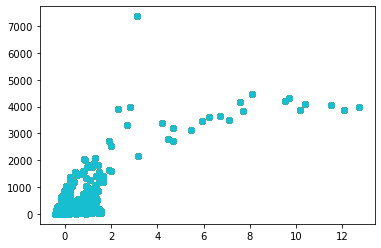

In [6]:
#this part is to extract the data from df_location that is relevant to the multiple linear regression model
#convert the string value to a number:
#
df_location["new_deaths"]=pd.to_numeric(df_location["new_deaths"], downcast='integer')
df_location["new_cases"]=pd.to_numeric(df_location["new_cases"], downcast='integer')
df_location['new_vaccinations']=pd.to_numeric(df_location['new_vaccinations'], downcast='integer')
#
features=['new_cases','new_vaccinations']
target=['new_deaths']
df_features,df_target=get_features_targets(df_location,features,target)
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features,df_target,random_state=100,test_size=0.3)
df_features_train_z=normalize_z(df_features_train)
X=prepare_feature(df_features_train_z)
target=prepare_target(df_target_train)

iterations=1500
alpha=0.01
beta=np.zeros((3,1))

beta,J_storage=gradient_descent(X,target,beta,alpha,iterations)
pred=predict(df_features_train_z,beta)
print (pred)




# Splitting data
### Target: New Deaths
### Feature: Total Vaccinations/Total Population and Median Age

In [ ]:
#this part is to extract the data from df_location that is relevant to the multiple linear regression model
#convert the string value to a number:
#
df_location["new_deaths"]=pd.to_numeric(df_location["new_deaths"], downcast='integer')
df_location["median_age"]=pd.to_numeric(df_location["median_age"], downcast='integer')
df_location['new_vaccinations']=pd.to_numeric(df_location['new_vaccinations'], downcast='integer')
#
features=['new_cases','new_vaccinations']
target=['new_deaths']
df_features,df_target=get_features_targets(df_location,features,target)
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features,df_target,random_state=100,test_size=0.3)
df_features_train_z=normalize_z(df_features_train)
X=prepare_feature(df_features_train_z)
target=prepare_target(df_target_train)

iterations=1500
alpha=0.01
beta=np.zeros((3,1))

beta,J_storage=gradient_descent(X,target,beta,alpha,iterations)
pred=predict(df_features_train_z,beta)
print (pred)




# Adjusted R-Squared Value from R-Squared Value
### Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)] = 0.5114271062684714

We chose Adjusted R-squared value due to it taking into accounts the number of predictor variables in Multiple Linear Regression.

In [22]:
def r2_score(y, ypred):
    
    
    ymean=np.mean(y)
    
    SS_res=np.sum((y-ypred)**2)
    
    SS_tot=np.sum((y-ymean)**2)
    return (1-(SS_res/SS_tot))

the_target = prepare_target(df_target_test)
pred = predict(df_features_test, beta)
r2= r2_score(the_target, pred)


Adjusted_R2= 1-((1-r2)*(len(df_target)-1)/(len(df_target)-df_features.shape[1]-1))

print(Adjusted_R2)


0.5114271062684714
